# The Walt Disney Company

This python assignment covers an analysis of the acquisitions of The Walt Disney Company, and its consequences and reasons. The assignment is made by:

|Name|ANR|SNR|
|----|-------|-------|
|Robert Hamberg|690622|1265888|
|Gé Cuijpers|848367|1265026|

## Abstract
In this article, we will be looking for an answer to the following two questions: Are the undertaken acquisitions of Walt Disney firm-value enhancing, destroying or neutral? What other important reasons, besides firm-value, for undertaking acquisitions does Walt Disney face? By doing a more quantitative analysis in the first part of the performance of Disney's stock in relation to the performance of the market, we conclude that the undertaken acquisitions are firm-value neutral. By doing a more qualitative analysis in the second part of the position of Disney in the theme park and motion picture industry over time, we conclude that the undertaken acquisitions help in maintaining and enlarging the position of Disney, which prevents Disney's value to deteriorate.

#### Table of contents:

1 [Introduction and motivation](#Introduction-and-motivation)

2 [Descriptive analysis](#Descriptive-analysis)

3 [Regression part](#Regression-part)
   1. [Finance theory explained](#Finance-theory-explained)
   2. [Regression output](#The-regression-output)
   3. [Short-run analysis](#Short-run-analysis)
   4. [T-tests of the acquisitions](#T-test-ABC-acquisition)
   5. [Results of these t-tests](#Results-of-the-five-t-tests)

4 [Competitive reasons](#Competitive-reasons)
   1. [Theme park industry](#Theme-park-industry)
       1. [Introduction theme park industry](#Introduction-theme-park-industry)
       2. [The case of Florida](#The-case-of-Florida)
       3. [Discussion theme park industry](#Discussion-theme-park-industry)
       4. [Conclusion theme park industry](#Conclusion-theme-park-industry)
 
   2. [Motion picture industry](#Motion-picture-industry)
       1. [Introduction motion picture industry](#Introduction-motion-picture-industry)  
       2. [Discussion motion picture industry](#Discussion-motion-picture-industry)
       3. [Conclusion motion picture industry](#Conclusion-motion-picture-industry)

5 [Conclusion](#Conclusion)


## Introduction and motivation
The Walt Disney Company was founded on October 16, 1923 in Los Angeles, United States, by Walt E. Disney and his brother Roy O. Disney. The company is a widely known conglomerate active in the mass media and entertainment industries. Over the last decades the company made some major acquisitions. The academic literature has shown that acquisitions often are value destroying instead of value enhancing. Morck, Shleifer and Vishny [(1990)](http://www.jstor.org/stable/2328808) show that managerial objectives may drive acquisitions that reduce the value of the acquiring firm. In Jensen [(1986)](http://www.jstor.org/stable/pdf/1818789) the author describes that the theory implies that managers of firms with unused borrowing power or large free cash flows tend to undertake value-destroying mergers and acquisitions. Jensen and Meckling [(1976)](https://www.sciencedirect.com/science/article/pii/0304405X7690026X) discuss the principal-agent problem in firms with stockholders. The managers are often not the ones, whose money is at stake and therefore they tend to behave in their own interest and not the interest of the owners / stockholders. The result is empire building and perquisites. The last can be for instance having a private jet. Disclosing perquisites causes severe drops in stock prices as is shown by Yarmeck [(2006)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=529822). Empire building relates to the Jensen [(1986)](http://www.jstor.org/stable/pdf/1818789) paper. Managers tend to pursue growth of the company instead of shareholder maximization. A larger company often results in managers enjoying more power and status. But also a higher managerial compensation, Gabaix, Landier and Sauvagnat [(2013)](http://pages.stern.nyu.edu/~xgabaix/papers/CEO_EJ.pdf). All these academic examples, which are only a small part of the total research on this topic, show that in many cases mergers and acquisitions are bad for companies. In this assignment we are approaching the acquisitions of Walt Disney from two perspectives, a regression based on the Finance literature of CAPM and a competitiveness perspective. 

This brings us more or less to the main question(s) of the assignment. Are the undertaken acquisitions of Walt Disney firm-value enhancing, destroying or neutral? What other important reasons, besides firm-value, for undertaking acquisitions does Walt Disney face?

We find no hard evidence of outperformance of the market portfolio by Walt Disney. However, we also find no evidence of underperformance as the literature in many cases suggests. From a competitiveness view Walt Disney needs to acquire new brands in order to stay the largest in market share. The theme park business has seen an increase in competitiveness over the last decade, which makes innovation and new themes in the theme parks necessary to remain attractive for visitors.

## Descriptive analysis
We start our analysis with importing a couple of Python packages. Afterwards, we use Python to collect financial data from Yahoo Finance. We collect daily share price data from 1995 to 12 January 2018 for The Walt Disney Company and the S&P500. For both a variable is made, which refers to the dataset of the corresponding company or index. Respectively these variables are called, stock_data_WaltDis and stock_data_SP500.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date
%matplotlib inline
import numpy as np

In [2]:
start = date(1995, 1, 1)
end = date(2018, 1, 12)
ticker = 'DIS'
data_source = 'yahoo'
stock_data_WaltDis = DataReader(ticker, data_source, start, end)

In [3]:
start = date(1995, 1, 1)
end = date(2018, 1, 12)
ticker = '^GSPC'
data_source = 'yahoo'
stock_data_SP500 = DataReader(ticker, data_source, start, end)

To get a feeling for the data and to check whether the right data are collected from the internet we look to the first 10 and the last 10 data points in both the Walt Disney and the S&P500 datasets. Especially the column with the header "Close" will be used later on in our analysis. Besides checking the first and last 10 data points, a graph from both datasets is made. This graph shows that both the stock (i.e. Walt Disney) and the index (i.e. S&P500) in general show a smooth increase over the years, excluding of course large financial shocks. The large drop from 2000 to 2003 can be explained by the collapse of the DotCom bubble and the terrorist attack in New York (9/11). The drop from 2008 to 2010 is the Financial Crisis, which was the result of the collapse of the housing bubble in the United States.
The mean closing value of the Walt Disney share is 42.49 USD and the mean closing value of the S&P500 is 1320.85 USD. The variance and the standard deviation for both are also displayed. These are both measures of risk and the standard deviation shows the volatility of the stock and the index. The last part of this section shows two ratios and "True" as output. The standard deviation divided by the mean of Walt Disney is larger than the same ratio for the S&P500. This exactly shows what one would expect and what the Finance theory predicts. Since the S&P500 consists of many firms it is a well-diversified portfolio with a lower standard deviation in relative terms (otherwise they can't be compared) than Walt Disney has.
Now we have explored the data, it can be concluded that we have a dataset that looks fine and which can be used for 
further analysis.

In [4]:
stock_data_WaltDis.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.121631,15.368178,15.121631,15.327087,11.762061,3810100
1995-01-04,15.327087,15.409270,14.998357,15.203814,11.667459,4620100
1995-01-05,15.203814,15.203814,14.998357,15.162722,11.635927,2928200
1995-01-06,15.162722,15.203814,15.080539,15.121631,11.604394,2864900
1995-01-09,15.121631,15.162722,14.998357,15.080539,11.572857,1783200
1995-01-10,15.080539,15.203814,14.833991,14.957265,11.478258,3078500
1995-01-11,14.957265,15.203814,14.792899,15.121631,11.604394,3548400
1995-01-12,15.121631,15.285996,14.998357,15.244905,11.698996,2984200
1995-01-13,15.244905,15.409270,15.162722,15.327087,11.762061,3701500


In [5]:
stock_data_WaltDis.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,108.050003,108.339996,107.510002,107.510002,107.510002,4538400
2018-01-02,108.949997,111.809998,108.559998,111.800003,111.800003,11014300
2018-01-03,112.190002,113.190002,111.449997,112.279999,112.279999,9237900
2018-01-04,112.949997,113.000000,111.629997,112.230003,112.230003,7417400
2018-01-05,112.680000,112.680000,111.239998,111.620003,111.620003,6008300
2018-01-08,110.889999,111.279999,109.540001,110.019997,110.019997,8052600
2018-01-09,110.129997,110.860001,109.860001,109.940002,109.940002,5838000
2018-01-10,109.959999,110.500000,109.010002,109.470001,109.470001,6060000
2018-01-11,110.250000,111.080002,109.510002,110.989998,110.989998,6427000


In [6]:
stock_data_SP500.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,459.209991,459.269989,457.200012,459.109985,459.109985,262450000
1995-01-04,459.130005,460.720001,457.559998,460.709991,460.709991,319510000
1995-01-05,460.730011,461.299988,459.750000,460.339996,460.339996,309050000
1995-01-06,460.380005,462.489990,459.470001,460.679993,460.679993,308070000
1995-01-09,460.670013,461.769989,459.739990,460.829987,460.829987,278790000
1995-01-10,460.899994,464.589996,460.899994,461.679993,461.679993,352450000
1995-01-11,461.679993,463.609985,458.649994,461.660004,461.660004,346310000
1995-01-12,461.640015,461.929993,460.630005,461.640015,461.640015,313040000
1995-01-13,461.640015,466.429993,461.640015,465.970001,465.970001,336740000


In [7]:
stock_data_SP500.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3357250000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000
2018-01-09,2751.149902,2759.139893,2747.860107,2751.290039,2751.290039,0
2018-01-10,2745.550049,2750.800049,2736.060059,2748.229980,2748.229980,3576350000
2018-01-11,2752.969971,2767.560059,2752.780029,2767.560059,2767.560059,3641320000


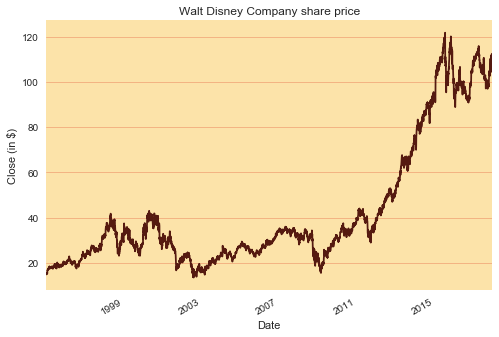

In [8]:
plt.style.use('seaborn')
stock_data_WaltDis['Close'].plot(color='#551A10', title='Walt Disney Company share price')
axes = plt.gca()
axes.set_facecolor('#FCE3A9')
axes.grid(axis='y', color='#E66E4C', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.set_axisbelow(True)
axes.set_ylabel('Close (in $)')
axes.set_xlabel('Date')

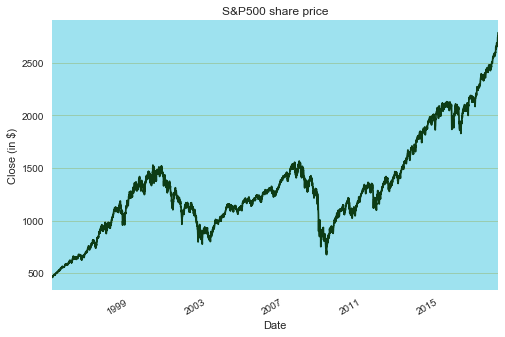

In [9]:
plt.style.use('seaborn')
stock_data_SP500['Close'].plot(color= '#0D3C15', title='S&P500 share price')
axes = plt.gca()
axes.set_facecolor('#9EE2EF')
axes.grid(axis='y', color='#93AB52', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.set_axisbelow(True)
axes.set_ylabel('Close (in $)')
axes.set_xlabel('Date')

In [10]:
Mean_WaltDis = np.mean(stock_data_WaltDis)
print(round(Mean_WaltDis,2))

Open              42.48
High              42.89
Low               42.06
Close             42.49
Adj Close         38.17
Volume       8355446.69
dtype: float64


In [11]:
Var_WaltDis = np.var(stock_data_WaltDis)
Std_WaltDis = np.std(stock_data_WaltDis)
print(round(Var_WaltDis, 2))
print(round(Std_WaltDis,2))

Open         8.001100e+02
High         8.073500e+02
Low          7.916800e+02
Close        7.997200e+02
Adj Close    8.304800e+02
Volume       2.817616e+13
dtype: float64
Open              28.29
High              28.41
Low               28.14
Close             28.28
Adj Close         28.82
Volume       5308122.11
dtype: float64


In [12]:
Mean_SP500 = np.mean(stock_data_SP500)
print(round(Mean_SP500,2))

Open         1.320500e+03
High         1.328390e+03
Low          1.312140e+03
Close        1.320850e+03
Adj Close    1.320850e+03
Volume       2.496715e+09
dtype: float64


In [13]:
Var_SP500= np.var(stock_data_SP500)
Std_SP500= np.std(stock_data_SP500)
print(round(Var_SP500,2))
print(round(Std_SP500,2))

Open         2.140795e+05
High         2.146453e+05
Low          2.134507e+05
Close        2.141629e+05
Adj Close    2.141629e+05
Volume       2.889163e+18
dtype: float64
Open         4.626900e+02
High         4.633000e+02
Low          4.620100e+02
Close        4.627800e+02
Adj Close    4.627800e+02
Volume       1.699754e+09
dtype: float64


In [14]:
print(Std_WaltDis["Close"]/Mean_WaltDis["Close"])
print(Std_SP500["Close"]/Mean_SP500["Close"])
print((Std_WaltDis["Close"]/Mean_WaltDis["Close"])>(Std_SP500["Close"]/Mean_SP500["Close"]))

0.6654933954940631
0.3503640589275837
True


## Regression part
In this part we are conducting a regression analysis of the two datasets. We want to obtain a regression with returns in percentages. Firstly, we need to convert our data to percentage changes, this is done with the [(prices.pct_change)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html) command in Python. Below for both datasets the percentage changes are displayed. In order to do the right regression we want to add both datasets to each other. Therefore, the command [(.join)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) will be used. The combined dataset is displayed afterwards.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
Prices = pd.DataFrame(stock_data_WaltDis)
Daily_return_WaltDis = Prices.pct_change(1)
print(Prices.pct_change(1))

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1995-01-03       NaN       NaN       NaN       NaN        NaN       NaN
1995-01-04  0.013587  0.002674 -0.008152 -0.008043  -0.008043  0.212593
1995-01-05 -0.008043 -0.013333  0.000000 -0.002703  -0.002703 -0.366204
1995-01-06 -0.002703  0.000000  0.005479 -0.002710  -0.002710 -0.021617
1995-01-09 -0.002710 -0.002703 -0.005450 -0.002717  -0.002718 -0.377570
1995-01-10 -0.002717  0.002710 -0.010959 -0.008174  -0.008174  0.726391
1995-01-11 -0.008174  0.000000 -0.002770  0.010989   0.010989  0.152639
1995-01-12  0.010989  0.005405  0.013889  0.008152   0.008152 -0.159001
1995-01-13  0.008152  0.008065  0.010959  0.005391   0.005391  0.240366
1995-01-16  0.008086  0.021333  0.013550  0.021448   0.021448  0.433662
1995-01-17  0.018717 -0.005222  0.005348  0.000000   0.000000 -0.315733
1995-01-18 -0.005249 -0.005249 -0.010638 -0.007874  -0.007874 -0

In [17]:
Prices = pd.DataFrame(stock_data_SP500)
Daily_return_SP500 = Prices.pct_change(1)
print(Prices.pct_change(1))

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1995-01-03       NaN       NaN       NaN       NaN        NaN       NaN
1995-01-04 -0.000174  0.003157  0.000787  0.003485   0.003485  0.217413
1995-01-05  0.003485  0.001259  0.004786 -0.000803  -0.000803 -0.032738
1995-01-06 -0.000760  0.002580 -0.000609  0.000739   0.000739 -0.003171
1995-01-09  0.000630 -0.001557  0.000588  0.000326   0.000326 -0.095043
1995-01-10  0.000499  0.006107  0.002523  0.001845   0.001845  0.264213
1995-01-11  0.001692 -0.002109 -0.004882 -0.000043  -0.000043 -0.017421
1995-01-12 -0.000087 -0.003624  0.004317 -0.000043  -0.000043 -0.096070
1995-01-13  0.000000  0.009742  0.002193  0.009380   0.009380  0.075709
1995-01-16  0.009380  0.008490  0.009380  0.007318   0.007318 -0.062155
1995-01-17  0.007318 -0.000510  0.004764  0.001427   0.001427  0.049745
1995-01-18  0.001427  0.000596 -0.000342 -0.000723  -0.000723  0

In [18]:
Mean_return_WaltDis = np.mean(Daily_return_WaltDis["Close"])
print(round(Mean_return_WaltDis,6))

0.000525


In [19]:
Var_return_WaltDis= np.var(Daily_return_WaltDis["Close"])
Std_return_WaltDis= np.std(Daily_return_WaltDis["Close"])
print(round(Var_return_WaltDis,6))
print(round(Std_return_WaltDis,6))

0.000363
0.019049


In [20]:
Mean_return_SP500 = np.mean(Daily_return_SP500["Close"])
print(round(Mean_return_SP500,6))

0.000379


In [21]:
Var_return_SP500= np.var(Daily_return_SP500["Close"])
Std_return_SP500= np.std(Daily_return_SP500["Close"])
print(round(Var_return_SP500,6))
print(round(Std_return_SP500,6))

0.000137
0.011699


In [22]:
print(Mean_return_WaltDis>Mean_return_SP500)

True


In [23]:
print(Std_return_WaltDis>Std_return_SP500)

True


In [24]:
print((Mean_return_WaltDis/Mean_return_SP500)<(Std_return_WaltDis/Std_return_SP500))

True


### Finance theory explained 
#### (part 1)
The above commands gave three times the output "True". The first two show that both the mean return and the standard deviation of the return of Walt Disney are higher than the ones of the S&P500. The third "True" shows that the ratio of mean Walt Disney to mean S&P500 is smaller than the ratio standard deviation Walt Disney to standard deviation S&P500. This shows a nice insight in the dataset, which coincides with the Finance model used in this part of the analysis. More details about the Finance model follow later on in this section. For now it is sufficient to explain what this difference in ratios means. The standard deviation shows total risk of a company or index. It consists of idiosyncratic risk (company specific risk) and systematic risk (risk along with the market). For systematic risk is compensated by expected returns, but for idiosyncratic risk not. Walt Disney has both risks, while the S&P500 is diversified and therefore only faces systematic risk. The outcome of the ratio is logical and coincides with the theory. A more diversified portfolio will have a better risk-return trade off than a single company (does the following phrase ring a bell? "Don't put all your eggs in one basket").

In [25]:
print(Mean_return_WaltDis/Std_return_WaltDis)
print(Mean_return_SP500/Std_return_SP500)

0.027558650821311474
0.032438209811484604


These outcomes show the Sharpe ratios of respectively, Walt Disney and the S&P500. Notice that the risk-free rate in the numerator is missing. This doesn't affect the comparison between both, since both are equally affected by including the risk-free rate. The Sharpe ratio gives a risk-return trade off, indeed it is higher for the S&P500. It gives the same conclusion as the third "True" statement above. Below both datasets are joined to make the datasets ready for the regression we are going to perform later on.

In [26]:
Daily_return = Daily_return_SP500.join(Daily_return_WaltDis, lsuffix='_SP500', rsuffix="_Disney")

In [27]:
print(Daily_return)

            Open_SP500  High_SP500  Low_SP500  Close_SP500  Adj Close_SP500  \
Date                                                                          
1995-01-03         NaN         NaN        NaN          NaN              NaN   
1995-01-04   -0.000174    0.003157   0.000787     0.003485         0.003485   
1995-01-05    0.003485    0.001259   0.004786    -0.000803        -0.000803   
1995-01-06   -0.000760    0.002580  -0.000609     0.000739         0.000739   
1995-01-09    0.000630   -0.001557   0.000588     0.000326         0.000326   
1995-01-10    0.000499    0.006107   0.002523     0.001845         0.001845   
1995-01-11    0.001692   -0.002109  -0.004882    -0.000043        -0.000043   
1995-01-12   -0.000087   -0.003624   0.004317    -0.000043        -0.000043   
1995-01-13    0.000000    0.009742   0.002193     0.009380         0.009380   
1995-01-16    0.009380    0.008490   0.009380     0.007318         0.007318   
1995-01-17    0.007318   -0.000510   0.004764     0.

### Finance theory explained 
#### (part 2)
Before proceeding with the regression output it is important to explain why we want to do a regression. Within the Finance literature there is a way to calculate and analyse whether a company is outperforming the market. We want to investigate whether the acquisitions of Walt Disney cause the company to outperform the market or not. In the case of outperforming the market, this would contradict the Finance theory suggesting that often acquisitions lead to worse firm performance and lower firm value. The way to analyse this we need to make use of the Capital Asset Pricing Model (CAPM), which is a model used in Finance to calculate the required rate of return of a stock depending on the risk it has along with the market. From the CAPM we take the Security Market Line (SML), which is shown below in the figure. In an efficient market, all the stocks would be on the SML, which is a linear line through the risk-free rate and the market portfolio. On the horizontal axis we have beta, which is a measure of systematic risk, this is risk along with the market. The vertical axis displays the expected return. The upward sloping linear line means that a higher risk along with the market leads to a higher expected return. Thus, more risk goes hand in hand with a higher compensation for bearing this risk.

A market portfolio does not exist in reality, but in Finance the S&P500 is often used as the market portfolio, since it includes the largest 500 American companies and for this is a very diversified portfolio. This also explains why we use data from the S&P500 in our analysis, we use this dataset to mimic the market portfolio.
The figure uses the words undervalued and overvalued stocks. Stocks that outperform the market are undervalued stocks. These are stocks with a positive alpha. When Walt Disney would be outperforming the market, they would be above the linear line in the undervalued stocks part of the graph. When the acquisitions of Walt Disney would be bad for firm performance Walt Disney would be in the lower part (overvalued stocks part). The alpha would be negative. Undervalued(overvalued) stocks are stocks that trade below(above) their true value and therefore obtain a higher(lower) return compared to the risk they bear. The efficient markets hypothesis predicts that divergence from the SML will cease to exist in the longer-run.

Now the question arises, how should the alpha be calculated? This can be done via a regression of the S&P500 stock return on the Walt Disney stock return. The alpha arises as the intercept of the regression output. The coefficient in front of the S&P500 variable displays the beta, the value of systematic risk.

The Security Market Line (SML):
![alt text](https://upload.wikimedia.org/wikipedia/en/thumb/f/f3/SML-chart.png/271px-SML-chart.png)

In [28]:
import statsmodels.formula.api as sm

In [29]:
result = sm.ols(formula="Close_Disney ~ Close_SP500", data=Daily_return).fit()

In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Close_Disney   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     4076.
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:28:45   Log-Likelihood:                 16284.
No. Observations:                5799   AIC:                        -3.256e+04
Df Residuals:                    5797   BIC:                        -3.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0001      0.000      0.667      

### The regression output
The above table shows the regression output. The middle of the table is of interest. The intercept coef value shows the alpha and the Close_SP500 coef value shows the beta. The alpha is 0.0001, but not statistically significant. Therefore, we can't conclude that the alpha is statistically significantly different from zero. In the data there is no evidence of outperformance of the market by Walt Disney. However, evidence in favour of the Finance literature is also absent. The alpha isn't statistically significantly different from zero in the negative way either. This shows that Walt Disney can be put on the linear line of the above figure. The beta of 1.0462 is statistically significant at the 1% level. The higher beta means that there will be a 1.0462%-points increase or decrease of Walt Disney for a 1%-points increase or decrease in the market portfolio (e.g. if the market portfolio value goes up by 2%-points, Walt Disney stock value goes up by 2.0924%-points). The Walt Disney point will be on the right of the M in the graph.

No evidence of a positive alpha over a long-time period does not suggest that there can't be a positive alpha in the short-run, which is corrected by the market. The efficient market theory quickly restores arbitrage opportunities in the market. Thus, since it could be the case that Walt Disney outperformed the market in the first year after the announcement of the acquisition, we will now look to some smaller time periods in the dataset. We focus on a one-year time period starting from the announcement month of a large acquisition. A one-year time horizon is taken, because generally up to one-year is considered as short-term.

### Short-run analysis
Below a graphical representation of the daily stock return of Walt Disney and the S&P500 can be found. This will be used to first have a graphical view on the acquisitions. Did they cause a spike in the daily return of Walt Disney compared to the S&P500?

The acquisition of ABC-Company was in 1996, it was announced in August 1995, it can be seen that during this period the daily returns of Walt Disney Company were higher than the S&P500. In January 2006 the announcement and in May 2006 the acquisition of Pixar took place, here as well a positive daily return much higher than the market return can be noticed. Marvel was acquired in the second half of 2009, a spike in the data occurs. The acquisition of Lucasfilm was at the end of 2012, no noticeable spike can be noticed. The acquisition of Fox at the end of 2017 is the pike at the end of the dataset, completely to the right. Thus, in the graph four out of five acquisitions show a positive spike in the daily return of Walt Disney compared to the market portfolio. Of course a statistical test is needed to show in more detail whether the outperformance in daily return is indeed statistically significant. We run five different t-tests to assess whether there is an outperformance of the market portfolio by Walt Disney in the short-run (five times, differing over the total dataset, a one-year time horizon starting at the announcement month of a large acquisition).

Note: in the discussion of the spikes in the years after the acquisition other events that possibly could have had an impact on the market or the Walt Disney stock are neglected. We are assuming these events have no large impact on either of the two or they impact both simultaneously and equally.

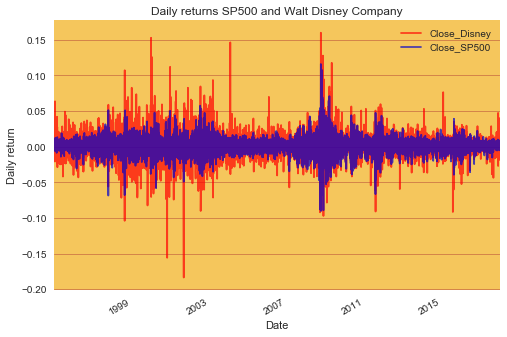

In [31]:
plt.style.use('seaborn')
Daily_return[['Close_Disney','Close_SP500']].plot(title='Daily returns SP500 and Walt Disney Company', alpha=0.7, color=["#FF0000","#0000CD"])
axes = plt.gca()
axes.set_facecolor('#F5C65C')
axes.grid(axis='y', color='#A3242D', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.set_axisbelow(True)
axes.set_ylabel('Daily return')
axes.set_xlabel('Date')

The five different acquisitions in turn will be analysed by their t-test. A t-test that is statistically significant provides evidence in favour of outperformance or underperformance depending on whether the mean value of the Walt Disney return is higher or lower than the mean value of the S&P500 return in that period. Mean values are displayed, but before conducting the t-test it is important to have the right time span (a one-year horizon starting at the announcement month). Accordingly, first a table with the dates and the closing returns in percentages is shown. If the time span is correct we can continue with the t-tests.

#### T-test ABC acquisition

In [32]:
Daily_return.iloc[146:400, [3,9]]

,Close_SP500,Close_Disney
Date,,
1995-08-01,-0.004306,0.049041
1995-08-02,-0.001501,-0.014228
1995-08-03,-0.000089,-0.020619
1995-08-04,0.000340,-0.023158
1995-08-07,0.001950,-0.019397
1995-08-08,0.000643,0.019780
1995-08-09,-0.001213,-0.004310
1995-08-10,-0.004038,0.002164
1995-08-11,-0.004198,-0.023758


In [33]:
from plotly import __version__
from plotly.offline import plot, iplot
from plotly import figure_factory as FF
import scipy.stats as stats

In [34]:
Daily_return_SP500meanABC=np.mean(Daily_return.iloc[146:400, [3]])
print(Daily_return_SP500meanABC)

Close_SP500    0.000534
dtype: float64


In [35]:
Daily_return_WaltDismeanABC=np.mean(Daily_return.iloc[146:400, [9]])
print(Daily_return_WaltDismeanABC)

Close_Disney   -0.000104
dtype: float64


In [36]:
twosample_resultABC = stats.ttest_ind(Daily_return.iloc[146:400, 3],Daily_return.iloc[146:400, 9])

In [37]:
matrix_twosampleABC=[
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_resultABC[0], twosample_resultABC[1]]
]

In [38]:
twosample_tableABC = FF.create_table(matrix_twosampleABC, index=True)
plot(twosample_tableABC, filename='twosample_tableABC')

/Applications/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `twosample_tableABC` didn't end with .html. Adding .html to the end of your file.



'file:///Users/Tieske/Downloads/Pyhton class material/Inleverversie/twosample_tableABC.html'

#### T-test Pixar acquisition

In [39]:
Daily_return.iloc[2772:3025, [3,9]]

,Close_SP500,Close_Disney
Date,,
2006-01-04,0.003673,-0.016803
2006-01-05,0.000016,0.017507
2006-01-06,0.009399,0.013519
2006-01-09,0.003656,0.010509
2006-01-10,-0.000357,0.012800
2006-01-11,0.003482,0.009479
2006-01-12,-0.006274,0.003130
2006-01-13,0.001205,0.002340
2006-01-17,-0.003635,-0.012451


In [40]:
Daily_return_SP500meanPIX=np.mean(Daily_return.iloc[2772:3025, [3]])
print(Daily_return_SP500meanPIX)

Close_SP500    0.000436
dtype: float64


In [41]:
Daily_return_WaltDismeanPIX=np.mean(Daily_return.iloc[2772:3025, [9]])
print(Daily_return_WaltDismeanPIX)

Close_Disney    0.001406
dtype: float64


In [42]:
twosample_resultPIX = stats.ttest_ind(Daily_return.iloc[2772:3025, 3],Daily_return.iloc[2772:3025, 9])

In [43]:
matrix_twosamplePIX=[
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_resultPIX[0], twosample_resultPIX[1]]
]

In [44]:
twosample_tablePIX = FF.create_table(matrix_twosamplePIX, index=True)
plot(twosample_tablePIX, filename='twosample_tablePIX')

/Applications/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `twosample_tablePIX` didn't end with .html. Adding .html to the end of your file.



'file:///Users/Tieske/Downloads/Pyhton class material/Inleverversie/twosample_tablePIX.html'

#### T-test Marvel acquisition

In [45]:
Daily_return.iloc[3654:3908, [3,9]]

,Close_SP500,Close_Disney
Date,,
2009-07-08,-0.001669,-0.012872
2009-07-09,0.003547,0.013040
2009-07-10,-0.004022,-0.005326
2009-07-13,0.024934,0.012941
2009-07-14,0.005316,0.018062
2009-07-15,0.029630,0.041973
2009-07-16,0.008642,0.029485
2009-07-17,-0.000383,-0.011295
2009-07-20,0.011432,0.035088


In [46]:
Daily_return_SP500meanMAR=np.mean(Daily_return.iloc[3654:3908, [3]])
print(Daily_return_SP500meanMAR)

Close_SP500    0.000863
dtype: float64


In [47]:
Daily_return_WaltDismeanMAR=np.mean(Daily_return.iloc[3654:3908, [9]])
print(Daily_return_WaltDismeanMAR)

Close_Disney    0.001733
dtype: float64


In [48]:
twosample_resultMAR = stats.ttest_ind(Daily_return.iloc[3654:3908, 3],Daily_return.iloc[3654:3908, 9])

In [49]:
matrix_twosampleMAR=[
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_resultMAR[0], twosample_resultMAR[1]]
]

In [50]:
twosample_tableMAR = FF.create_table(matrix_twosampleMAR, index=True)
plot(twosample_tableMAR, filename='twosample_tableMAR')

/Applications/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `twosample_tableMAR` didn't end with .html. Adding .html to the end of your file.



'file:///Users/Tieske/Downloads/Pyhton class material/Inleverversie/twosample_tableMAR.html'

#### T-test Lucasfilm acquisition

In [51]:
Daily_return.iloc[4464:4718, [3,9]]

,Close_SP500,Close_Disney
Date,,
2012-09-21,-0.000075,0.001519
2012-09-24,-0.002233,0.003413
2012-09-25,-0.010502,-0.007181
2012-09-26,-0.005737,-0.011420
2012-09-27,0.009649,0.012322
2012-09-28,-0.004478,-0.005706
2012-10-01,0.002652,-0.004017
2012-10-02,0.000872,-0.008258
2012-10-03,0.003624,0.016073


In [52]:
Daily_return_SP500meanLUC=np.mean(Daily_return.iloc[4464:4718, [3]])
print(Daily_return_SP500meanLUC)

Close_SP500    0.000622
dtype: float64


In [53]:
Daily_return_WaltDismeanLUC=np.mean(Daily_return.iloc[4464:4718, [9]])
print(Daily_return_WaltDismeanLUC)

Close_Disney    0.000912
dtype: float64


In [54]:
twosample_resultLUC = stats.ttest_ind(Daily_return.iloc[4464:4718, 3],Daily_return.iloc[4464:4718, 9])

In [55]:
matrix_twosampleLUC=[
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_resultLUC[0], twosample_resultLUC[1]]
]

In [56]:
twosample_tableLUC = FF.create_table(matrix_twosampleLUC, index=True)
plot(twosample_tableLUC, filename='twosample_tableLUC')

/Applications/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `twosample_tableLUC` didn't end with .html. Adding .html to the end of your file.



'file:///Users/Tieske/Downloads/Pyhton class material/Inleverversie/twosample_tableLUC.html'

#### T-test Fox acquisition
The announcement of the acquisition of Fox was at the end of 2017. Unfortunately, we can't take data for a one-year time horizon. Nevertheless, we decided to include the announcement and the stock data for the three months at the end of 2017 and beginning of 2018 in our analysis.

In [57]:
Daily_return.iloc[-55:, [3,9]]

,Close_SP500,Close_Disney
Date,,
2017-10-25,-0.004663,-0.004985
2017-10-26,0.001271,0.007771
2017-10-27,0.008073,-0.002537
2017-10-30,-0.003192,-0.002746
2017-10-31,0.000944,-0.002346
2017-11-01,0.001592,0.012473
2017-11-02,0.000190,-0.006867
2017-11-03,0.003097,0.002949
2017-11-06,0.001271,0.020276


In [58]:
Daily_return_SP500meanFOX=np.mean(Daily_return.iloc[-55:, [3]])
print(Daily_return_SP500meanFOX)

Close_SP500    0.001484
dtype: float64


In [59]:
Daily_return_WaltDismeanFOX=np.mean(Daily_return.iloc[-55:, [9]])
print(Daily_return_WaltDismeanFOX)

Close_Disney    0.002538
dtype: float64


In [60]:
twosample_resultFOX = stats.ttest_ind(Daily_return.iloc[-55:, 3],Daily_return.iloc[-55:, 9])

In [61]:
matrix_twosampleFOX=[
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_resultFOX[0], twosample_resultFOX[1]]
]

In [62]:
twosample_tableFOX = FF.create_table(matrix_twosampleFOX, index=True)
plot(twosample_tableFOX, filename='twosample_tableFOX')

/Applications/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `twosample_tableFOX` didn't end with .html. Adding .html to the end of your file.



'file:///Users/Tieske/Downloads/Pyhton class material/Inleverversie/twosample_tableFOX.html'

#### Results of the five t-tests
All the above t-tests show the same result. The difference between the daily returns of Walt Disney and the S&P500 is statistically not significant. Unfortunately, we have to conclude that also on a short-term basis the acquisitions of Walt Disney do not lead to outperformance of the market. Nevertheless, the absence of evidence for outperformance indirectly leads to another positive outcome. No evidence of underperformance of Walt Disney on both the long-run and short-run is found either. So, there is no evidence found of agency costs, like empire building, with negative consequences for the firm value. This contradicts predicted negative outcomes of acquisitions found in the literature. Where this result might seem to disappoint, one shouldn't forget that finding no hard evidence in the data is a result as well. Besides, being able to conclude that Walt Disney doesn't underperform despite all the acquisitions is a strong and positive result opposite to a large part of the academic literature.

As already mentioned in our motivation, Walt Disney acts in a competitive market where innovation and new themes are important. Acquisitions are an important tool to accomplish a strong market position in this business. Consequently, all Walt Disney's acquisitions have a different goal besides simply creating firm value or destroying it (by empire building or perquisites). We will now proceed with the second part of our analysis, the competitiveness part.

## Competitive reasons

We've seen that the M&A-strategy of the Walt Disney Company hasn't led to a higher performance than expected on the stock market, however, Disney is currently pursuing the biggest acquisition in its history. This might be because of reasons such as empire building, but are there other possibilities that justify this strategy? In this section, we will have a look into the two markets Disney is most known for: the theme park industry and the motion picture industry. We will discuss the competitive structure over time, the position of Disney in these markets over the last years and how Disney's M&A-strategy could influence the position in the market.

### Theme park industry
#### Introduction theme park industry
Historically, Disney has an important position in the theme park industry. Walt Disney wanted to create a place where families would go to have fun. At that time, there were mainly amusement parks with unthemed attractions, where drunkenness and fights were not uncommon. Walt Disney had a plan for a fully themed park, where no alcoholic drinks were offered, where people would forget everyday life and everyone would feel like a child again. On the 17th of July 1955, the park could finally be opened in Anaheim, California, and Walter Elias Disney said the following, for the theme park industry legendary, words: 

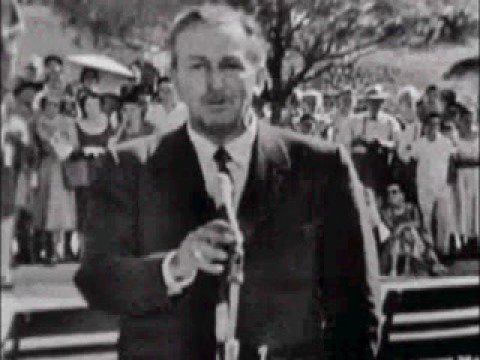

In [63]:
from IPython.display import YouTubeVideo
YouTubeVideo('qnlGOtV1-gA')

[(Alternative link)](https://www.youtube.com/watch?v=qnlGOtV1-gA)

Ever since, Disney expanded the park, opened new parks and resorts, first in Orlando, Florida, then in Tokyo, Paris, Hong Kong and Shanghai. With the immense success of the Studio Entertainment department, Disney had access to great budgets and was able to set the level of theming of theme parks to a new high worldwide. As a result, Disney became the absolute number one theme park group in the world.

Since 2006, [TEA](http://www.teaconnect.org/) and [AECOM](http://www.aecom.com/) bring out the [Theme Index](http://www.aecom.com/theme-index/) (the Theme and Museum Index as of 2012), with the attendance report of all big theme parks and theme park groups. This data has been converted to an excel file and is used for the following data frame.

In [64]:
tp_ms = pd.read_excel(open('theme parks market shares.xlsx','rb'), sheetname='market shares')
tp_ms

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Disney,41.421208,41.107975,38.562092,38.606159,37.558393,36.070834,35.344830,36.098893,34.264448,33.105273,32.035951
Six Flags,10.493373,8.786168,8.267974,7.714749,7.567736,7.220109,7.195893,7.108172,6.539655,6.855501,6.869785
Universal,9.499264,9.315455,8.398693,7.682334,8.190595,9.151414,9.645291,9.902419,10.241838,10.775022,10.805285
Cedar Fair,9.094256,7.798165,7.418301,6.839546,7.100592,6.952698,6.595071,6.405253,5.944562,5.869079,5.728015
Anheuser-Busch Themeparks/SeaWorld,7.989691,7.868737,7.516340,7.617504,6.976020,7.012123,6.793482,6.372844,5.713462,5.394473,5.019771
Merlin,5.891016,11.326747,11.503268,12.479741,12.768608,13.786546,15.090417,16.286157,16.018814,14.523858,13.964090
Tussauds,5.265096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Compagnie des Alpes,3.681885,3.387438,3.104575,3.241491,2.802865,2.736511,2.598905,0.000000,0.000000,0.000000,0.000000
Parques Reunidos,3.387334,4.234298,8.137255,8.038898,8.034880,7.790587,7.581537,7.085568,5.664232,0.000000,4.751670
Everland,3.276878,3.034580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###### Explanation graph theme parks
In this data frame, we take the total attendance of the parks of the 10 biggest theme park groups and, for simplicity, will consider this as the whole market. Then, based on the attendance rates, we calculate the market shares. Smaller groups and individual parks would change the numbers, but the insights would still be the same. The data indicates that Disney is indeed by far the leading group in the industry. In the next graph, we show how the market share of Disney has developed over the 11 years. We do this by dropping all other groups in the data frame. To be able to plot correctly, we have to transpose the data frame. Since we want to use fancy colors in the graph, we make a list of color codes to use in the graph. Then we get to the code for the graph itself, we want a bar graph, without a legend, with the colors listed in the list. That would give us our basic graph, we further specify the limits on the y-axis, horizontal gridlines, the color for the background and the labels for the axes.

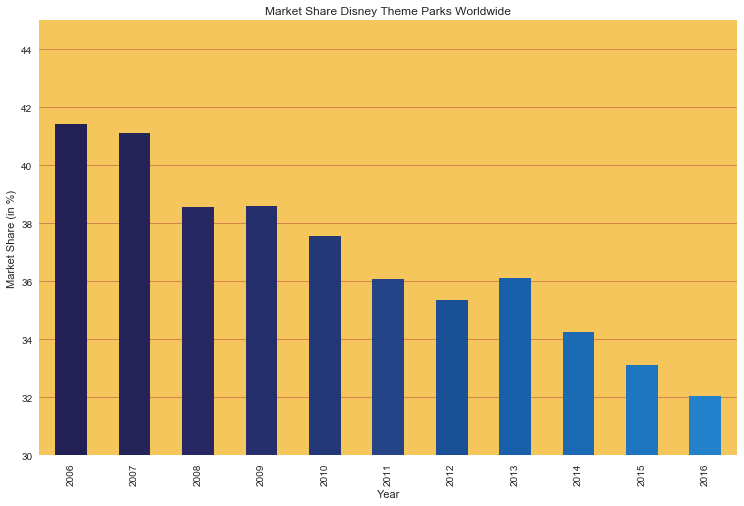

In [65]:
tp_Disney = tp_ms.drop(tp_ms.index[1:])
tp_Disney_plot = tp_Disney.T
my_colors = ['#232055', '#242458', '#272861', '#252F6C', '#243877', '#254487', '#1A5096', '#1860AA', '#1C6AB4', '#1E76C0', '#2482CC']
tp_Disney_plot.plot(kind='bar', legend=False, color=my_colors, title='Market Share Disney Theme Parks Worldwide', figsize=(12.5,8))
axes = plt.gca()
axes.set_ylim([30,45])
axes.set_facecolor('#F5C65C')
axes.grid(axis='y', color='#A3242D', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.set_axisbelow(True)
axes.set_ylabel('Market Share (in %)')
axes.set_xlabel('Year')

So, we see that the worldwide market share of Disney has been declining over the years, except for 2013. This is not due to stagnating attendance numbers, but lower growth than the rest of the industry. The reason for lower growth might be that Disney was running against its capacity constraints in some of the parks and opted to rise prices. This meant relatively less guests in the park, but a higher profit per guest. A notable outlier in this trend is 2013. In this year, the Tokyo and Hong Kong resort had a double-digit percentage growth in attendance. This is most likely due to the 30<sup>th</sup> anniversary of the Tokyo Disney Resort, the opening of the renewed *Star Tours: The Adventure Continues* in Tokyo Disneyland and the opening of *Mystic Point*, a themed area with the award winning dark ride *Mystic Manor*. However, based on the market share, we see that Disney is facing stronger competition. We will now show another way of depicting an increase in competition.

In [66]:
def f(x):
    return x/100
tp_ms_small = tp_ms.apply(f, axis=1)
def g(x):
    return x**2
tp_ms_smallsquared = tp_ms_small.apply(g, axis=1)
tp_ms_hhi = tp_ms_smallsquared.sum(axis=0)
def h(x):
    return 1/x
tp_ms_invhhi = tp_ms_hhi.apply(h)
tp_ms_invhhi.round(decimals=2)

2006    4.63
2007    4.64
2008    5.07
2009    5.06
2010    5.22
2011    5.43
2012    5.48
2013    5.23
2014    5.66
2015    5.98
2016    6.21
dtype: float64

Above, the calculation of the inverse Herfindahl index (HHI) is shown. First, we take our theme parks market share data frame, divide all elements in this data frame by 100, since that will give us the percentages on a 0 to 1 scale. Then we are going to calculate the HHI, of which the formula is as follows:
$$
HHI=\sum_{i=1}^{N}s_i^2
$$
So, we first square all of our elements and then take the sum of every column to know the HHI. To make it more intuitive, we take the inverse of the HHI, which is $\frac{1}{HHI}$. This number indicates how many equally large firms equal the current market structure. Hence, a low number means the market structure is (close to) an oligopoly or even a monopoly, while a large number means the market structure is (close to) a competitive market.

Next follows a graphical depiction of the numbers calculated above. The exercise is the same as in [the graph](#Explanation-graph-theme-parks) for the market share of Disney worldwide.

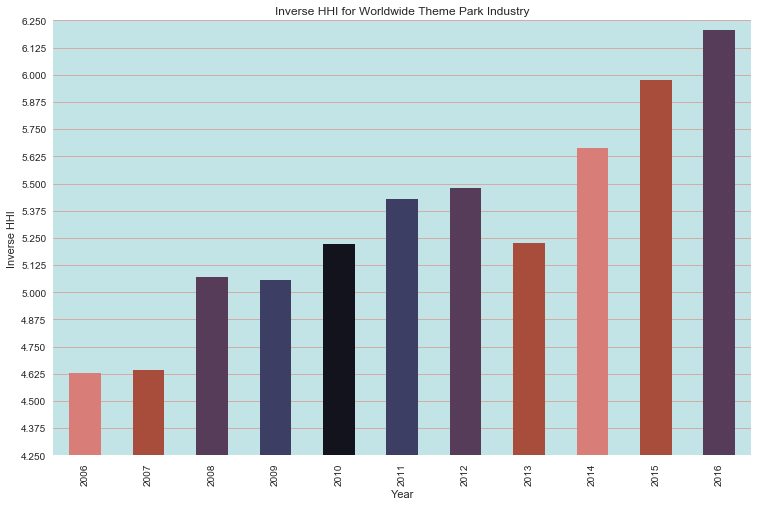

In [67]:
my_colors4 = ['#D97D78', '#A84C3B', '#573C5A', '#3D3E63', 
              '#13131D', '#3D3E63', '#573C5A', '#A84C3B']
tp_ms_invhhi.plot(kind='bar', color=my_colors4, title='Inverse HHI for Worldwide Theme Park Industry', figsize=(12.5,8))
axes = plt.gca()
axes.set_ylim([4.25,6.25])
axes.set_facecolor('#C3E4E7')
axes.grid(axis='y', color='#EB5A49', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.yaxis.set_major_locator(plt.MultipleLocator(0.125))
axes.set_ylabel('Inverse HHI')
axes.set_xlabel('Year')
axes.set_axisbelow(True)

Since we only look at the ten largest theme park groups, we know the numbers above should always be below 10. We can clearly see that over the years, there is a trend towards a more competitive market. This means that the smaller groups are gaining on the larger groups and the parks in their portfolios will become more and more competitive compared to the parks of the big theme park groups. In theme park terms, more competition generally leads to more investments and a nice example of this is the case of Florida.
#### The case of Florida
A special place in the theme park industry is Florida and namely Orlando. Orlando is even referred to as the theme park Mecca and some of the most impressive theme parks of the world are to be found here. Two big resorts that can be found here, are those of Disney and Universal. Disney's Walt Disney World includes the theme parks Disney's Magic Kingdom, EPCOT (Experimental Prototype Community of Tomorrow), Disney's Hollywood Studios and Disney's Animal Kingdom. Universal's Universal Orlando Resort includes the theme parks Universal Studios Florida and Islands of Adventure. Apart from Universal and Disney, also SeaWorld has two large theme parks in Florida, being SeaWorld Orlando and Busch Gardens Tampa Bay. Over the years, competition has grown and these days, especially Universal and Disney are keen to bring their newest innovations and largest projects to one of the parks in their Orlando resort. That gives us the following dataframe, again with data from the [TEA/AECOM Attendance Report](http://www.aecom.com/theme-index/).

In [68]:
FL_ms = pd.read_excel(open('theme parks market shares.xlsx','rb'), sheetname='FL market shares')
FL_ms

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Disney,67.824387,68.279570,68.317635,70.316709,68.980369,67.157799,67.009711,67.277364,67.127306,66.350711,65.795146
Universal,16.989926,16.899157,16.704825,15.031819,17.395253,19.416019,19.582545,20.405342,21.385829,22.563416,23.708638
Seaworld,15.185686,14.821273,14.977539,14.651473,13.624377,13.426181,13.407744,12.317294,11.486865,11.085873,10.496216


Once again, we equal the attendance of these three groups to the whole market, especially since the rest of the Floridian theme parks will have no significant impact on the numbers. We repeat the same exercise as done for [the graph](#Explanation-graph-theme-parks) of Disney's market share in the worldwide market, but we will include Universal too in this graph, since this resort is the biggest competitor in Orlando (although Walt Disney World is still a lot larger, the Universal Orlando Resort is considered as a real threat to Walt Disney World [for some time already](http://www.nytimes.com/2012/05/21/business/universal-armed-with-cash-from-comcast-takes-aim-at-disney.html)). The difference with the previous plots is that we have two y-axes now, an ax1 for the prime y-axis, for Disney, and an ax2 for the secondary y-axis, for Universal.

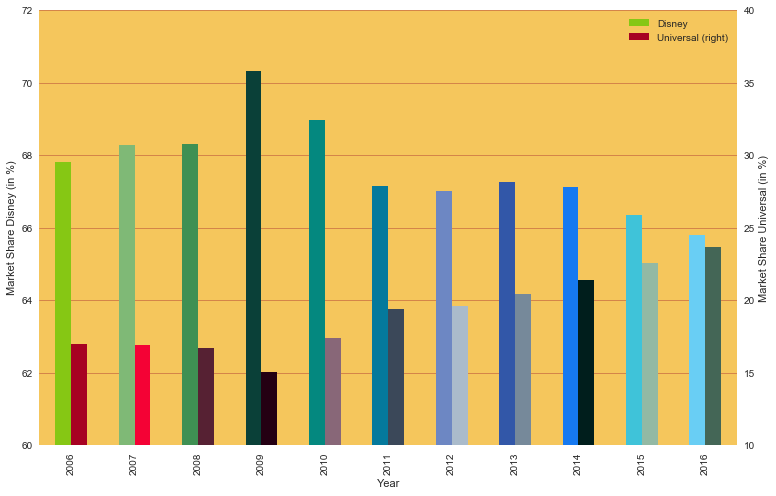

In [69]:
FL_DU = FL_ms.drop(FL_ms.index[[2]])
FL_DU_plot = FL_DU.T
Disney_colors = ('#86C714', '#7FB976', '#3F9053', '#0A4038', '#04887F', '#05799C', 
                 '#6D87C3', '#3257A8', '#1679F0', '#3FC3D9', '#69CEF4')
Universal_colors = ('#A70222', '#F40235', '#562133', '#240013', '#886778', '#3B4859', 
                    '#AABBCB', '#76899A', '#001E1C', '#93B9A4', '#446656')
FL_DU_plot.plot(kind='bar', color=(Disney_colors, Universal_colors), secondary_y='Universal', figsize=(12.5,8))
all_axes = plt.gcf().get_axes()
ax1 = all_axes[0]
ax2 = all_axes[1]
ax1.set_ylim(60, 72)
ax1.grid(b=False)
ax1.set_ylabel('Market Share Disney (in %)')
ax1.set_facecolor('#F5C65C')
ax2.set_ylim(10,40)
ax2.grid(b=False)
ax2.set_ylabel('Market Share Universal (in %)')
ax1.grid(axis='y', color='#A3242D', alpha=0.5, lw=0.8)
ax1.grid(b=False, axis='x')
ax1.set_axisbelow(True)
ax1.set_xlabel('Year')

We see in this graph that, contrary to the worldwide picture, Disney's market share isn't decline almost constantly, but that it is making a sort of wavy movement. On the upside, especially 2009 stands out, where Walt Disney World was the only resort to have higher attendance rates than the year before, hence had an even higher market share. The last couple of years will be more of a concern to Disney, where the market share is lowest in the relevant years and declining. For Universal, we see that since 2010, its market share started growing at a steady pace. It has become the clear number two in the Floridian theme park industry and is in the position to aim at Disney's leadership position over the next years. In the next part of this section, we will discuss what happened over the last years, how the next couple of years are going to look like and the role of intellectual property (IP) in this.
#### Discussion theme park industry
Over the last years, Disney has hardly invested in the Walt Disney World resort attraction wise, which meant that they wouldn't attract a lot of new visitors. And as we have seen, Universal started to become bigger and bigger since 2010. The rise of Universal is mainly due to the investment in the *Wizarding World of Harry Potter*, a collaboration between [Universal Orlando and Warner Bros Entertainment](https://www.theguardian.com/world/2007/may/31/film.harrypotter), which opened that year in Islands of Adventure. In 2014 Universal Studios also opened a Harry Potter themed area and this would lead to another rise in attendance rates. This showed the effect that IP-based attractions and themed areas could have on the success of your park. Of course, this was not entirely new in the industry, but Universal managed to put up an area that would make guests feel like they are part of the story they know that well. It was a whole new experience and would set a new standard. The success of the *Wizarding World of Harry Potter* exceeded expectations and Disney knew it had to come up with new areas and attractions, since Universal was not planning to stop expanding here. The new plans of Disney meant total restructuring of some parks and big expansions for others. In 2017, Disney opened a new area in Disney's Animal Kingdom, *Pandora*, themed after the Avatar franchise, [in cooperation with James Cameron](http://articles.latimes.com/2011/sep/21/business/la-fi-ct-disney-avatar-20110921). This had to compete with the new waterpark in the Universal Studios Resort, *Volcano Bay*, and a new dark ride in the Universal Studios park, *Skull Island: Reign of Kong*. Which resort performed better will be announced later this year. In the upcoming years, Disney will expand their parks with themed lands *Toy Story Land* ([2018](https://disneyworld.disney.go.com/destinations/hollywood-studios/toy-story-land/)), *Star Wars: Galaxy's Edge* ([2019](https://thewaltdisneycompany.com/pandora-world-avatar-open-may-27-star-wars-lands-coming-2019/)) and dark ride *Mickey and Minnie’s Runaway Railway* ([2019](http://wdwnt.com/2017/11/breaking-opening-date-revealed-mickey-minnies-runaway-railway-disneys-hollywood-studios/)) for Disney's Hollywood Studios, a *Tron* coaster ([before 2021](https://disneyparks.disney.go.com/blog/2017/07/tron-attraction-coming-to-magic-kingdom-park-at-walt-disney-world-resort/)) for the Magic Kingdom park and a *Ratatouille* dark ride and *Guardians of the Galaxy* coaster ([both before 2021](https://disneyparks.disney.go.com/blog/2017/07/guardians-of-the-galaxy-ratatouille-attractions-coming-to-epcot/)) for EPCOT. This means that no attraction is not IP-based and only two attractions (the Mickey and Minnie dark ride and Tron coaster) are based on IP that Disney hasn't bought. Of course, so far it is unclear whether these expansions will bring success to Walt Disney World, but it indicated the importance of bought IP for Disney. Following the rumours, especially *Star Wars: Galaxy's Edge* has to show that Disney is able to make themed areas better than the *Wizarding World of Harry Potter*. Universal on the other hand also has some expansions planned. They will open dark ride *Fast & Furious: Supercharged* ([2018](https://www.universalorlando.com/web/en/us/things-to-do/rides-attractions/fast-furious-supercharged/index.html)) and themed area *Super Nintendo World* (opening date unknown) for Universal Studios and a *Harry Potter* coaster ([2019](http://www.themeparkinsider.com/flume/201801/5889/)) for Islands of Adventure. We can expect the competition to become stronger by the day and more big expansions in the future. One thing has become clear, these days only IP-based expansions will give you the ability to compete.
![alt text](https://timedotcom.files.wordpress.com/2014/07/140707_em_diagonalleypot_1.jpg)
*Diagon Alley in Universal Studios Orlando*

#### Conclusion theme park industry
We've seen that over the course of the years, Disney has lost some market share among the biggest theme park groups worldwide. The Disney parks haven't grown as fast as the rest of the industry, although this is partly caused by rising entry fees for guests, in order to hold the capacity constraints. Still, some parks have lost some guests to the competitors, for example in Europe. The case of Florida shows in particular how big the role of IP-based attractions is these days. In order to keep ahead of the competition, Disney will have a need to keep on investing in new attractions, where IP will be key. Confirmed expansions of Disney show that often bought IP is being used for the theming. This shows that the M&A-strategy of Disney also leads to a larger choice in possible theming for successful theme park expansions, leading to at least consolidation of their position. Hence, Disney's M&A-strategy might be increasing its value through the Parks and Resorts department.

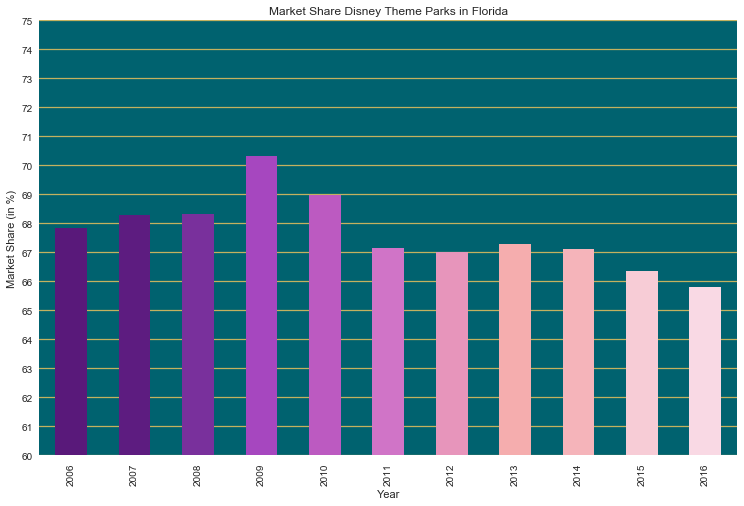

In [70]:
FL_Disney = FL_ms.drop(FL_ms.index[1:])
FL_Disney_plot = FL_Disney.T
my_colors2 = ['#59197A', '#5D1C80', '#79309C', '#A647BF', '#BC5AC1', '#D074C7', '#E795BB', '#F5ADAE', '#F5B4BA', '#F7CCD6', '#F9D9E4']
FL_Disney_plot.plot(kind='bar', legend=False, color=my_colors2, title='Market Share Disney Theme Parks in Florida', figsize=(12.5,8))
axes = plt.gca()
axes.set_ylim([60,75])
axes.set_facecolor('#00626F')
axes.grid(axis='y', color='#F5C65C', alpha=0.8, lw=1.25)
axes.grid(b=False, axis='x')
axes.yaxis.set_major_locator(plt.MultipleLocator(1))
axes.set_ylabel('Market Share (in %)')
axes.set_xlabel('Year')

### Motion picture industry
*Note: in this part, we will mention several movies, for more information about these movies, you could visit sites as the [Internet Movie Database](http://www.imdb.com/).
#### Introduction motion picture industry
The main activity of the Walt Disney Company has been, and still is, the production of movies. In the 20s and 30s of the last century, Walt Disney's little studio produced the first short films, the start of what would become a future innovating leader of the industry. In 1928, the most famous Disney character, voiced by Walt Disney himself, was born. Being one of the first films with fully synchronized sound, Steamboat Willie marks the start of an era.

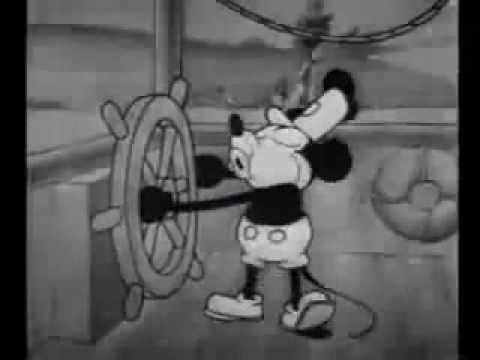

In [71]:
YouTubeVideo('iep9EJ9H1aU')

[(Alternative link)](https://www.youtube.com/watch?v=iep9EJ9H1aU)

After having successes with animated shorts, Disney wanted to do something completely new: a full length [cel animated](https://en.wikipedia.org/wiki/Traditional_animation) feature. In other words, a movie of about an hour and a half, consisting of drawn content only. Walt Disney's aim was to create a suspension of disbelief, so that the audience would care for the characters in the movie. The movie we're talking about: *Snow White and the Seven Dwarfs*. The production cost of this movie was extraordinary high for that time, Disney even ran out of money during production and had to loan additional money. In other words, the film had to be a success. During the premiere, Disney was waiting for one scene that would immediately indicate whether they succeeded in suspending the disbelief of the audience.

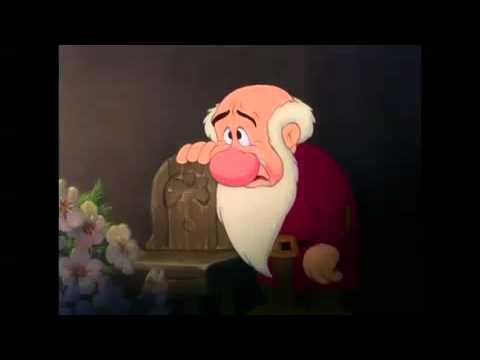

In [72]:
YouTubeVideo('hIi-PDYtTks')

[(Alternative link)](https://www.youtube.com/watch?v=hIi-PDYtTks)

During this scene, several audients started crying and it was clear: they were able to make people cry over some drawings, *Snow White and the Seven Dwarfs* would be successful. After this immense success, many new successes would follow. However, it hasn't been all roses for Disney. After the passing of Walt Disney, the popularity of the company's movies declined. Restructuring was needed and in the 90s the so-called *Disney Renaissance* started. For a decade, Disney once again produced new classics, such as *The Little Mermaid*, *Beauty and the Beast*, *Aladdin* and *The Lion King*. Nonetheless, after this decade, the decline returned. Disney suffered from competition, for example Pixar and DreamWorks. It is in this timeframe that Disney started to act as in the saying: if you can't beat them, join them (or in this case buy them). Disney bought Pixar, Marvel and Lucasfilm, meaning that they would own some big franchises and receive its revenues. Especially the last couple of years, they produced a lot of films using these franchises, which became instant hits. This made Disney the new leader in the industry, as also can be seen in the following data frame. Here, we take the market shares of the box office revenues by parent company as provided by [Box Office Mojo](http://www.boxofficemojo.com/studio/?debug=0&view=parent&p=.htm). We took the 7 companies that had a significant market shares over the years and all other companies are packed in 'Other'.

In [73]:
fs_ms = pd.read_excel(open('film studios market shares.xlsx','rb'), sheetname='market shares')
fs_ms

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Disney,20.3,18.5,15.7,21.0,16.3,12.5,16.7,15.3,11.4,12.1,13.9,12.2,13.9,14.9,14.9,19.8,26.3,21.8
Time Warner,17.2,22.0,21.3,23.0,17.8,21.7,14.9,20.5,19.7,20.2,19.1,17.9,17.9,21.3,18.8,16.9,16.7,18.4
NBC/Universal,14.3,11.8,9.8,12.7,10.9,13.2,10.8,12.7,13.1,10.1,9.0,11.5,13.2,13.3,11.4,22.3,14.1,15.0
Viacom (Paramount),10.7,11.3,7.4,7.2,6.8,9.8,10.8,16.1,17.3,14.5,16.2,19.3,8.2,8.4,9.7,5.9,7.7,4.8
Dreamworks,10.3,4.9,5.2,3.0,10.0,5.7,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
News Corporation (Fox),9.8,11.2,11.6,9.7,11.8,16.5,17.0,11.9,12.8,15.5,15.3,11.1,10.2,10.2,17.9,12.4,13.3,12.9
Sony,9.6,10.7,17.4,13.4,14.7,11.1,19.2,13.3,13.6,14.1,12.6,13.4,16.5,10.6,12.0,8.9,8.3,9.9
Other,7.8,9.6,11.6,10.0,11.7,9.5,10.4,10.2,12.1,13.5,13.9,14.6,20.1,21.3,15.3,13.8,13.6,17.2


###### Explanation graph film studios
The data indicates that Disney is currently indeed the leading group in the industry. In the next graph, we show how the market share of Disney has developed over the 11 years. We do this by dropping all other groups in the data frame. To be able to plot correctly, we have to transpose the data frame. Since we want to use fancy colors in the graph, we make a list of color codes to use in the graph. Then we get to the code for the graph itself, we want a bar graph, without a legend, with the colors listed in the list. That would give us our basic graph, we further specify the limits on the y-axis, horizontal gridlines, the color for the background and the labels for the axes.

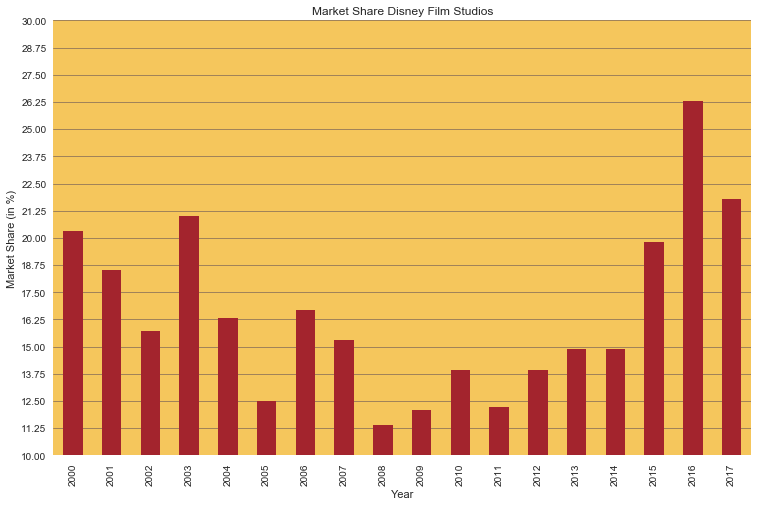

In [74]:
fs_Disney = fs_ms.drop(fs_ms.index[1:])
fs_Disney_plot = fs_Disney.T
fs_Disney_plot.plot(kind='bar', legend=False, color='#A3242D',title='Market Share Disney Film Studios', figsize=(12.5,8))
axes = plt.gca()
axes.set_ylim([10,30])
axes.set_facecolor('#F5C65C')
axes.grid(axis='y', color='#232055', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.yaxis.set_major_locator(plt.MultipleLocator(1.25))
axes.set_ylabel('Market Share (in %)')
axes.set_xlabel('Year')
axes.set_axisbelow(True)

An important note is that, despite being an independent firm, Pixar distributed their movies via Disney. This means that Pixar movies are part of Disney's market share and we will not see the impact of this acquisition back in the market share directly. 

In [75]:
fs_ms_withoutother = fs_ms.drop(fs_ms.index[[7]])
def f(x):
    return x/100
fs_ms_small = fs_ms_withoutother.apply(f, axis=1)
def g(x):
    return x**2
fs_ms_smallsquared = fs_ms_small.apply(g, axis=1)
fs_ms_hhi = fs_ms_smallsquared.sum(axis=0)
def h(x):
    return 1/x
fs_ms_invhhi = fs_ms_hhi.apply(h)
fs_ms_invhhi.round(decimals=2)

2000    7.57
2001    7.37
2002    7.60
2003    6.82
2004    8.31
2005    7.55
2006    7.18
2007    7.18
2008    7.48
2009    7.66
2010    7.73
2011    7.83
2012    8.84
2013    8.78
2014    7.91
2015    6.93
2016    6.78
2017    7.54
dtype: float64

Above, the calculation of the inverse Herfindahl index (HHI) is shown. First, we take our theme parks market share data frame, divide all elements in this data frame by 100, since that will give us the percentages on a 0 to 1 scale. Then we are going to calculate the HHI, of which the formula is as follows:
$$
HHI=\sum_{i=1}^{N}s_i^2
$$
So, we first square all of our elements and then take the sum of every column to know the HHI. To make it more intuitive, we take the inverse of the HHI, which is $\frac{1}{HHI}$. This number indicates how many equally large firms equal the current market structure. Hence, a low number means the market structure is (close to) an oligopoly or even a monopoly, while a large number means the market structure is (close to) a competitive market.

Next follows a graphical depiction of the numbers calculated above. The exercise is the same as in [the graph](#Explanation-graph-film-studios) for the market share of Disney.

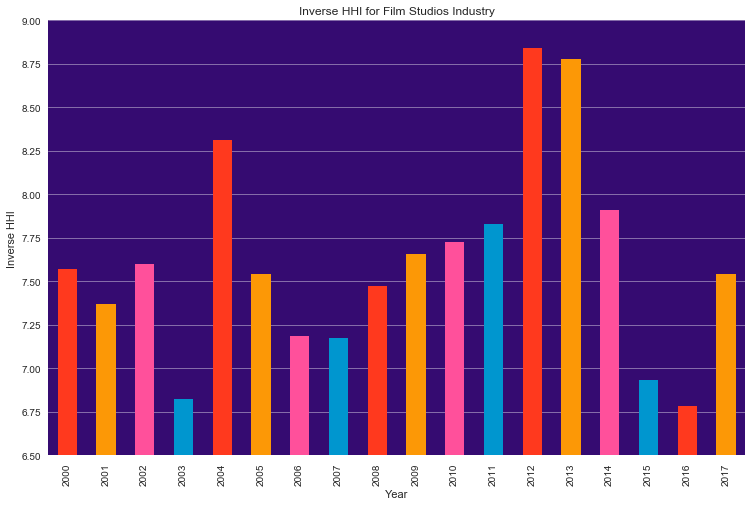

In [76]:
my_color5 = ['#FF391E', '#FC9806', '#FF509B', '#0096CF']
fs_ms_invhhi.plot(kind='bar', color=my_color5, title='Inverse HHI for Film Studios Industry', figsize=(12.5,8))
axes = plt.gca()
axes.set_ylim([6.5,9])
axes.set_facecolor('#350B71')
axes.grid(axis='y', color='white', alpha=0.5, lw=0.8)
axes.grid(b=False, axis='x')
axes.yaxis.set_major_locator(plt.MultipleLocator(0.25))
axes.set_ylabel('Inverse HHI')
axes.set_xlabel('Year')
axes.set_axisbelow(True)

In this procedure, we only use the 7 best performing companies over time. This means that we implicitly assume that there are many other companies and all these companies have a neglectable market share. Of course, this is not completely true, but the current numbers will already provide the right insights and it saves a considerable amount of time. Once again, higher numbers mean more competition. What we see is that the level of competition is somewhat volatile, the difference between the lowest and highest numbers equal the difference of two firms, where each firm has the same market share. Two firms might seem little difference, but the competitive structure could change quite a bit due to such a change. 
#### Discussion motion picture industry
When looking at the market shares, we see that in the 00s, 2003 stands out in a positive sense. The start of the new millennium marked the end of the *Disney Renaissance*, where the perceived quality of the movies declined once more and commercial successes became more and more unusual. In 2003, Disney had commercial successes with *Jungle Book 2*, *Pirates of the Caribbean* and Pixar's *Finding Nemo*. In a negative way, 2005, 2008 and 2009 stand out. In these years, Disney wasn't able to produce a lot of real blockbusters. Most known pictures of these years are *WALL-E*, *Bolt* and *Up*. At the same time, the competing studios brought films like *Star Wars: Episode III*, *Avatar* (Fox), two *Harry Potter* movies, *The Dark Knight* (Warner Bros), *Indiana Jones and the Kingdom of the Crystal Skull* and *Transformers: Revenge of the Fallen* (Paramount) to the floor. The start of the second decade of this century was difficult for the Studio Entertainment division. After 2011 was a year with some average movies and sequels that were not received that well, 2012 marked the turning point. It was in this year that Disney managed to deliver animated pictures that were at least somewhat successful, namely *Brave* and *Wreck it Ralph*. But the biggest part of their box office income, came from their first Marvel movie: *The Avengers*, grossing over 1.5 billion dollars worldwide. From this year on, Disney would produce one or more Marvel films each year, each grossing over half a billion dollars at least and, apart from *The Avengers*, three grossing more than a billion dollars worldwide. This in addition to the animations of Walt Disney Animation and Pixar, where the blockbusters started to follow too with pictures as *Frozen* (2013, box office: 1.2 billion), *Zootopia* (2016, box office: 1 billion) and *Finding Dory* (2016, box office: 1 billion). Still, from 2015 onwards, we see an immense increase in Disney's market share, which will not only be explained by the success of the more original Disney movies and Marvel movies. But 2015 also was the first year Disney brought out a film of one of the Lucasfilm franchises: *Star Wars: The Force Awakens*. This movie grossed a stunning 2 billion dollars worldwide in box office. In 2016 and 2017, Disney produced another two *Star Wars* pictures, each grossing over a billion. So, Disney held three trump cards at this point, serving a broad range of target audiences, causing them to soar to the top spot in the market.
This also comes back in the inverse HHI, where it is Interesting to see, that Disney seems to have an impact on the competitive structure. In the last, for Disney very successful, years, we see that the inverse HHI has dropped a bit. Given the current strategy of the production of movies and the upcoming acquisition of Fox, it is not unrealistic to imagine that Disney might end up with half of all box office income in the upcoming years.
![alt text](https://metrouk2.files.wordpress.com/2017/12/star-wars-the-last-jedi.jpg)
*Star Wars: The Last Jedi*

#### Conclusion motion picture industry
We've seen that over the course of the years, Disney has lost some market share, especially during the second half of te 00s and the first half of the 10s, but gained market share massively in the last couple of years. Although Disney is still able to produce blockbusters with IP they created themselves, bought IP plays a role of an increasing proportion of Disney productions. We've also seen that these bought IP's have brought great successes to the company and made Disney the leader of the motion picture industry. We've shown that the M&A-strategy of Disney leads to a larger choice in possible target audiences for successful movies, leading to an improvement of their position. Hence, Disney's M&A-strategy might be increasing its value through the Studio Entertainment department.

## Conclusion

We started this assignment with a question regarding the acquisitions of The Walt Disney Company. Finance theory claims that most mergers and acquisitions are the result of managers pursuing a larger company, higher salary and additional perks. The two corresponding terms are empire building and perquisites. Therefore, Walt Disney is an interesting company to investigate. The regressions on the total dataset, as well as the t-tests on smaller parts of the dataset have shown that the Finance theory is wrong regarding to the Walt Disney acquisitions. The company doesn't outperform the market, but also doesn't underperform compared to the market. Where the first part of this assignment concluded that we have a neutral performance of Walt Disney, the second part found some interesting findings supporting the acquisitions strategy of Walt Disney. In both the theme park and the motion picture industries we have seen that theming is an important concept. Obtaining more themes, provides more ways to introduce new themes in the parks or start new movie sequels. The inverse Herfindahl-Hirschman Index for the theme parks has increased over the years, this means that the market becomes more and more competitive and the reason for the growth of Walt Disney's competitors is the use of new theme contents in the parks. Hence, it is very important for Walt Disney to remain obtaining new theme contents. A good way to accomplish this is to acquire other companies. In the motion industry we even saw that the acquisitions of Walt Disney resulted in a steep increase in its market share and a drop of the inverse Herfindahl-Hirschman Index. Walt Disney has grown fast and accordingly changed the competitiveness in the market. All in all, we saw that the Walt Disney acquisitions can be defended and it can even be stated that that they are necessary for Walt Disney to remain their strong market position. Unfortunately, we didn't find evidence of outperformance, but we did find evidence of Walt Disney not wasting money on value-destroying acquisitions.

Of course our assignment only covers a part of the total picture. The Fox acquisition can be analysed when it is finished and sufficient stock data and attendance rates are available. Further research into the reasons people take into account when choosing to visit a park. Do they indeed choose one park over the other park, because its themes are more attractive? The shortcomings of the CAPM are also present in our regression output and the corresponding conclusion. The analysis on the Walt Disney stock could be done again. In a repeated analysis different ways of analysing stock data, for instance including a multiples analysis, could be used.